# Signal

In this notebook we are going to evaluate and assess the signal quality of the electronic equipment, namely the signal quality of the digital signal synthesizer and the amplification thereof.

In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [3]:
source_h = pd.read_hdf('../dataset/signal/source.h5', 'horizontal')
source_h = source_h[(source_h.time > 0) & (source_h.time < 10e-6)]

source_v = pd.read_hdf('../dataset/signal/source.h5', 'vertical')
source_v = source_v[(source_v.time > 0) & (source_v.time < 10e-6)]

In [9]:
from scipy.optimize import curve_fit

def chirp(t, A, f0, f1, T, phi):
    return A*np.cos(2*np.pi*(f0+(f1-f0)*t/T)*t+phi)

## Synthesizer

In [15]:
def fn(t, A, phi):
    return chirp(t, A, 90e6, 110e6, 10e-6, phi)

#p, _ = curve_fit(fn, source_h.time, source_h.voltage, p0=[.8, 0], bounds=([.6, 0], [1.0, 2*np.pi]), maxfev=1000)

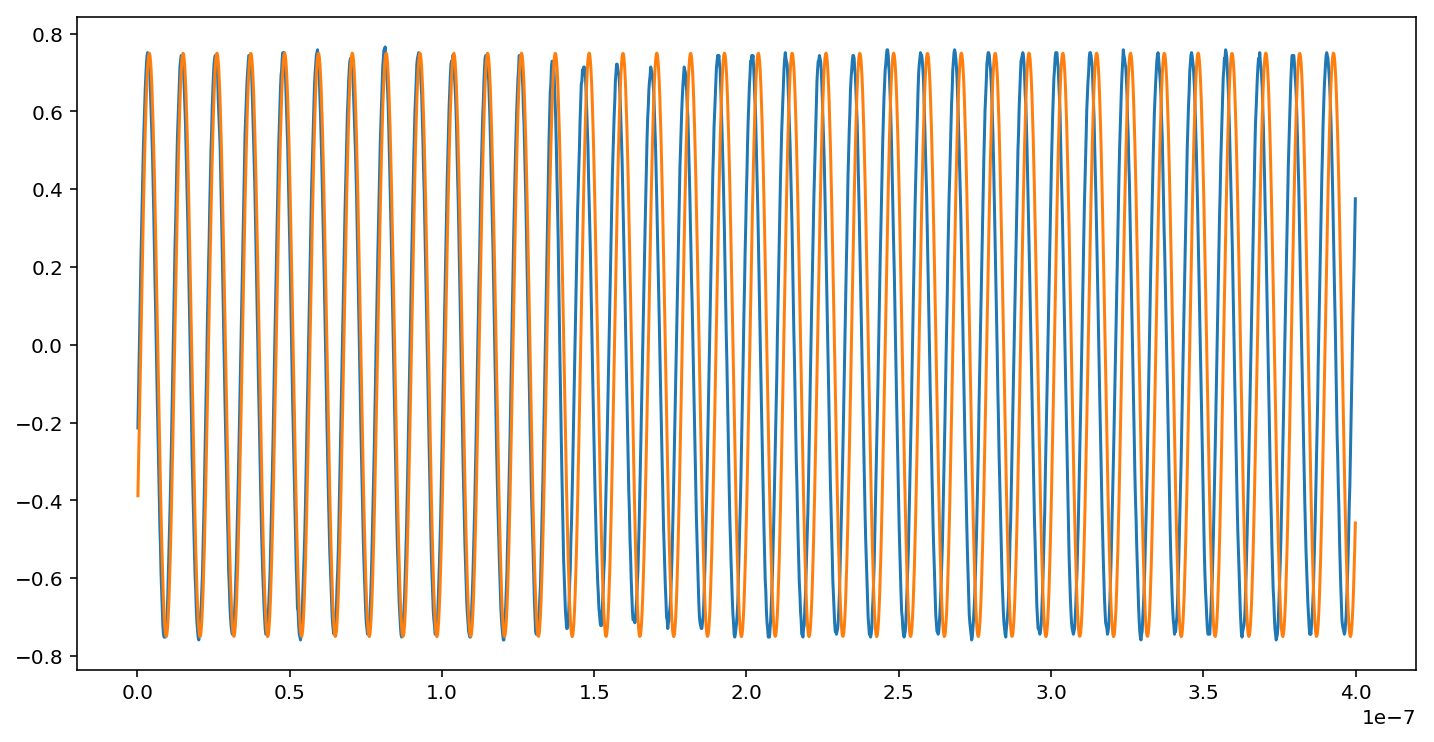

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(source_h.time[:2000], source_h.voltage[:2000])
#plt.plot(source_h.time[:2000], fn(source_h.time, .75, 1.3*np.pi)[:2000])
plt.plot(source_h.time[:2000], .75*np.cos(2*np.pi*90e6*source_h.time+1.3*np.pi)[:2000])

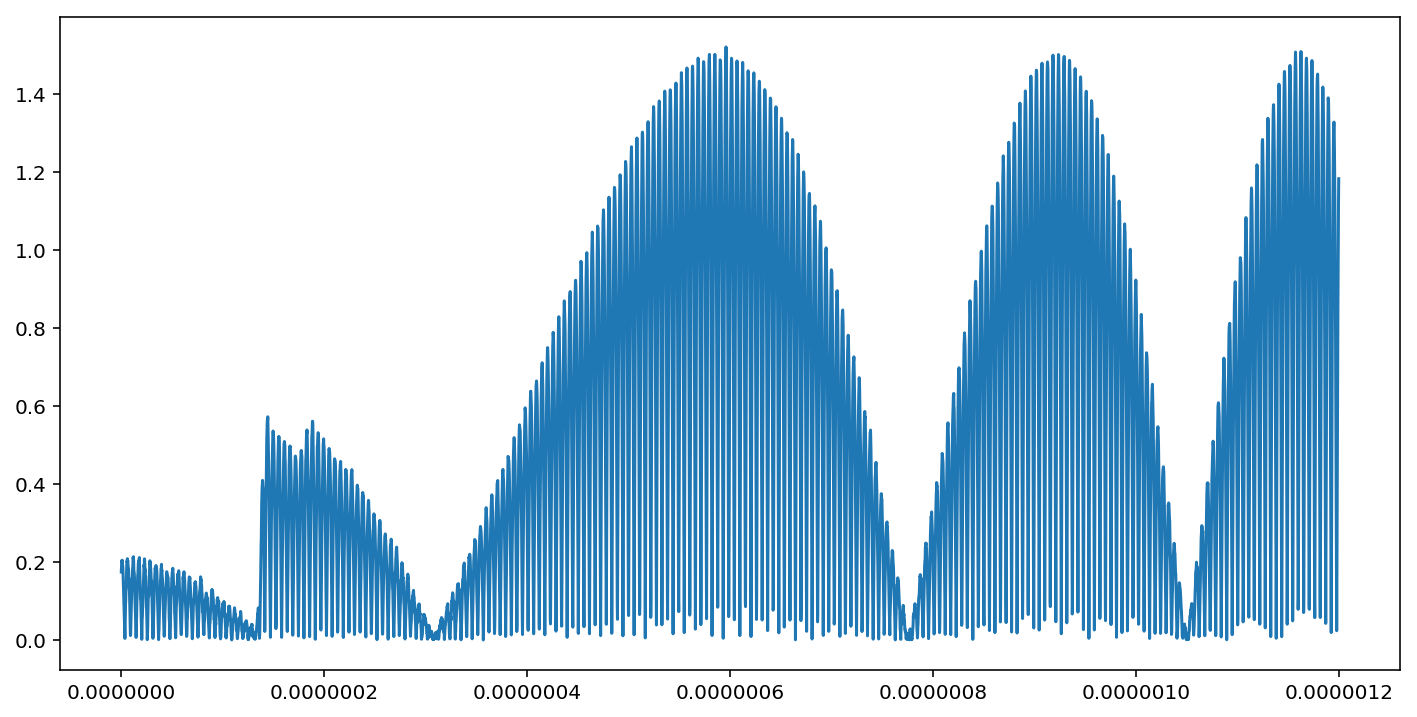

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(source_h.time[:6000], np.abs(source_h.voltage-fn(source_h.time, .75, 1.3*np.pi))[:6000])

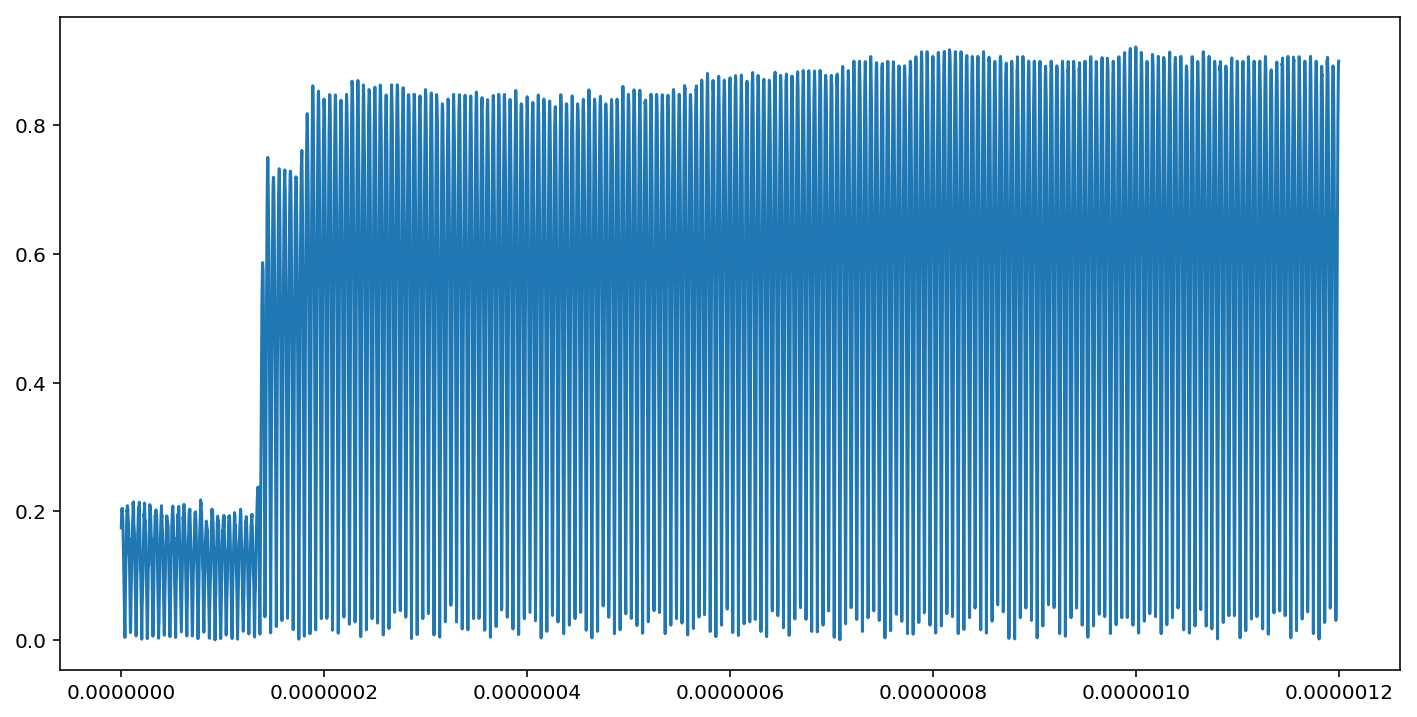

In [53]:
plt.figure(figsize=(12, 6))
plt.plot(source_h.time[:6000], np.abs(source_h.voltage-chirp(source_h.time, .75,90e6, 90e6, 10e-6, 1.3*np.pi))[:6000])

In [36]:
fft = np.fft.fft(source_h.voltage)
# sample rate
T = source_h.time.values[1] - source_h.time.values[0]
N = fft.size
f = np.linspace(0, 1/T, N)

In [41]:
freq = f[:N // 2]
power = np.abs(fft)[:N // 2] / N

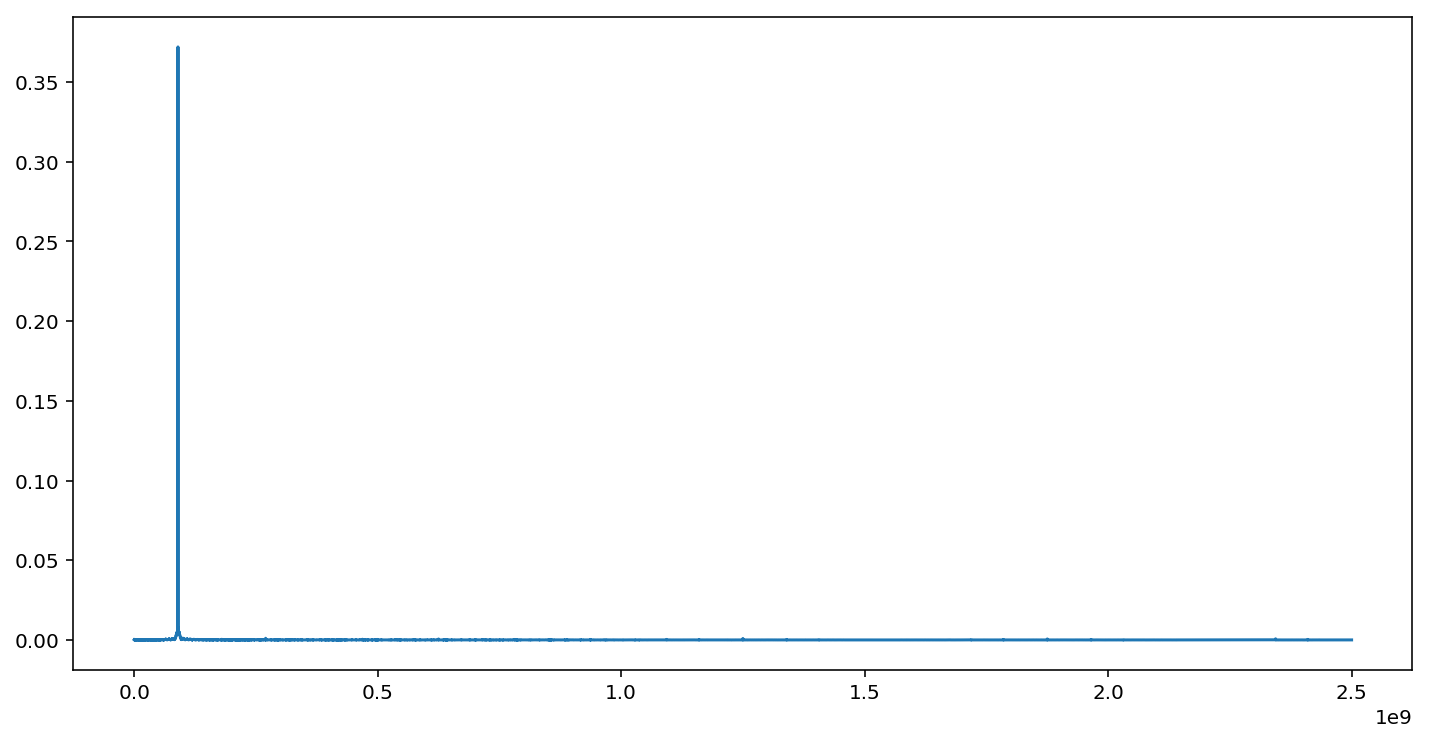

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(freq, power)

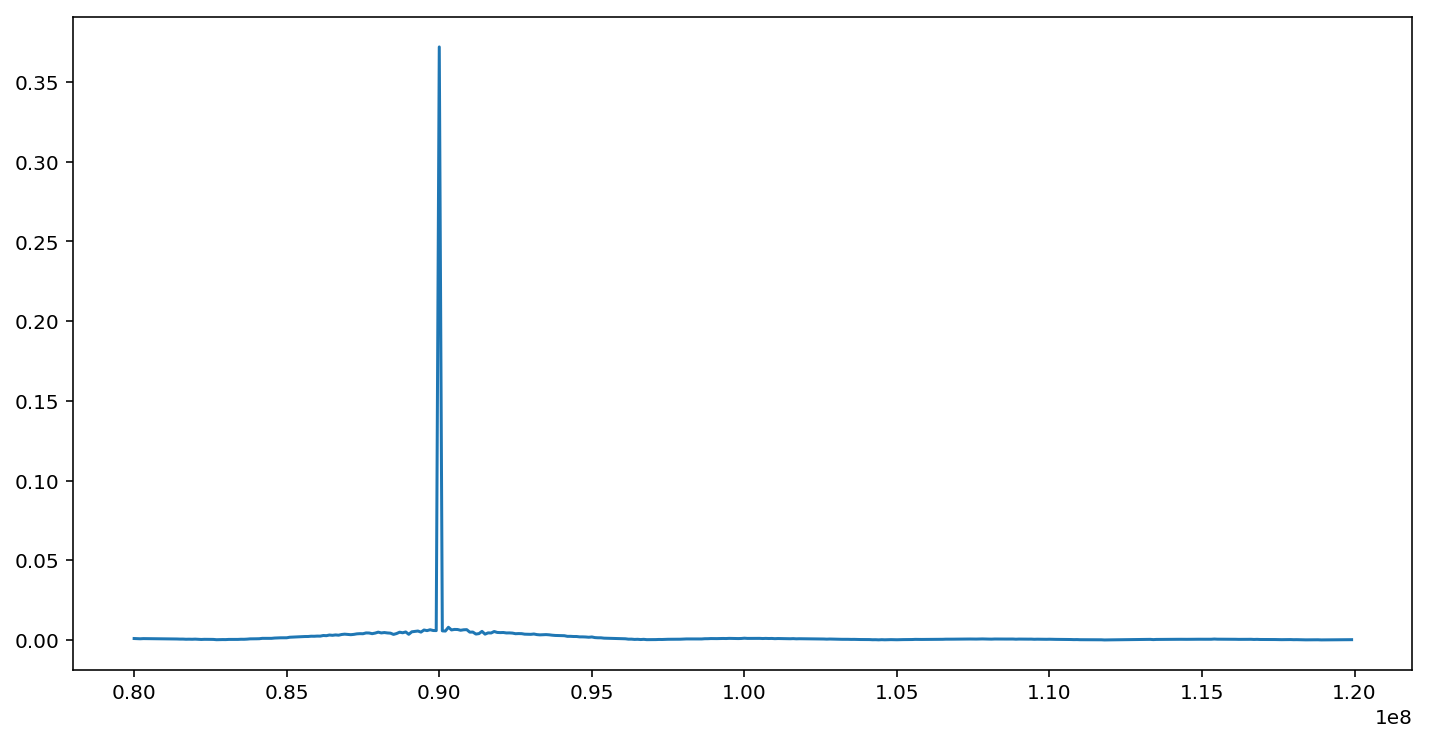

In [56]:
select = (freq > 80e6) & (freq < 120e6)

plt.figure(figsize=(12, 6))
plt.plot(freq[select], power[select])

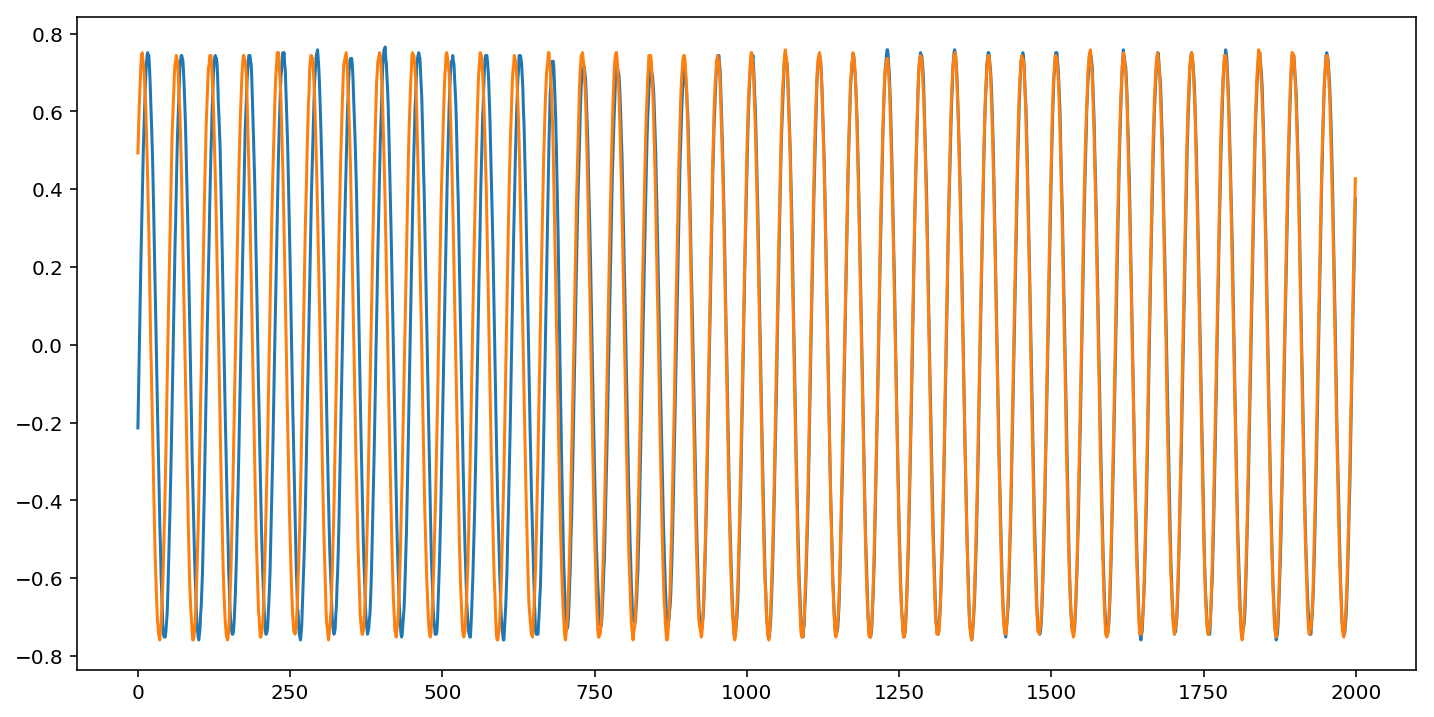

In [52]:
plt.figure(figsize=(12, 6))
plt.plot(source_h.voltage.values[:2000])
plt.plot(source_h.voltage.values[-2000:])

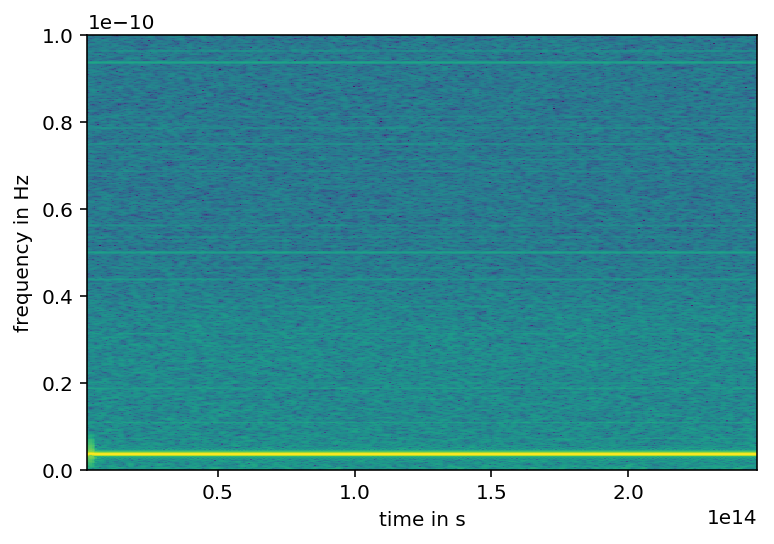

In [60]:
plt.specgram(source_h.voltage.values, NFFT=1024, Fs=T, noverlap=900)
plt.xlabel('time in s')
plt.ylabel('frequency in Hz')
plt.show()

In [61]:
amp_h = pd.read_hdf('../dataset/signal/amplifier.h5', 'horizontal')

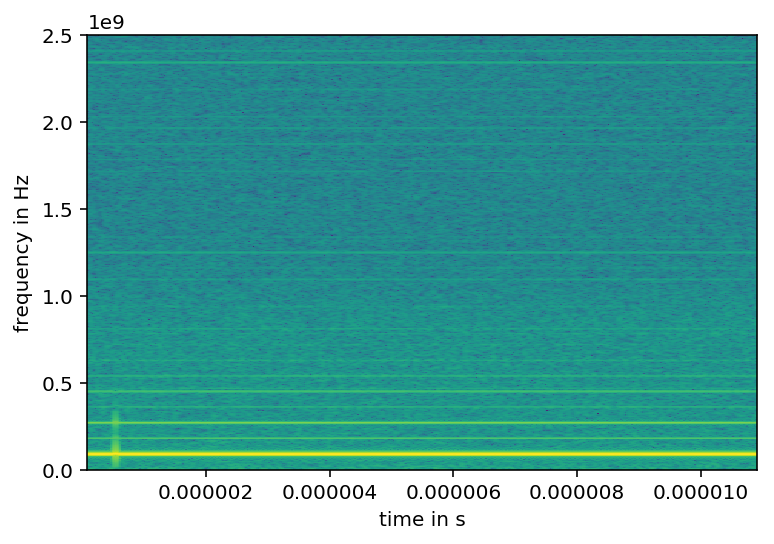

In [62]:
plt.specgram(amp_h.voltage.values, NFFT=1024, Fs=1/(amp_h.time[1]-amp_h.time[0]), noverlap=900)
plt.xlabel('time in s')
plt.ylabel('frequency in Hz')
plt.show()